## Implementation of Basic Probability Concepts for Random Variables 
Brief Description:  
1) Random variables of normal distribution and Bernoulli distribution will be studied;  
2) The probability concepts include mean, variance, $L^p$ norm ($p < \infty$), $L^{\infty}$ norm, covariance;  
3) The built-in functions in numpy will be called if they exist. In addition, all the probability concepts will be defined explicitly for illustrations;  
4) Sample statistic will be used as an estimation for the corresponding probablity concept. The accuracy will be quantified, which lies in the theory of statistical inference. 

In [4]:
# Import the packages that will be used in the file:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, fixed
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns

### 1. Normal Distribution

In [11]:
#Draw 50 samples from a random variable of normal distribution with mean = 0 and standard deviation = 1:
sample_normal = np.random.normal(0,1,50)
print(sample_normal)

[ 0.33126559  0.68056907  2.03949393  1.98999521  1.73138665  1.12727195
  0.54415507 -0.55228519  0.67355508  1.30311385  0.34066929 -0.07904808
 -0.71717002 -1.32876725  0.96243664 -0.29030662  1.61562318 -0.53453993
  0.28285365  0.41913051 -1.12760017  0.10984453 -0.22996114  0.36926766
 -0.80095877 -1.5429744   0.88040779 -1.09301201 -0.56515724  1.86194542
  0.26544394 -1.14931284 -0.30573409 -0.44125493 -0.13982374 -0.20638593
  0.29724608  0.29281036 -0.36518581 -0.67327054 -0.48347802  0.99678373
  0.03517132 -0.64628359 -0.20005689 -0.22329234  0.39064985  0.75064237
 -0.28468031  0.25748069]


#### 1.1 Implement basic probability concepts for samples drawn from the standard normal distribution using numpy functions (mean and variance):

Let $X$ denote a random varible. Mean of the random varible is defined as follows.  
Definition of mean:  
$\mathbb{E}X := \int_{\Omega} X(\omega) dP(\omega) $, where $P$ represents the probability measure.

In [12]:
#Compute sample mean of sample_normal using numpy:
np.mean(sample_normal)

0.13137347126850668

###### Question 1.1.1: 

###### (a) Why is it reasonable to use sample mean for the estimation of the mean of the random variable? (Hint: Law of large numbers (VB, Theorem 1.3.1). More precisely, let N:= sample size, then the sample could be viewed as a realization of N independent random variables of the standard normal distribution).
##### (b) Intuitively, the larger number of samples, the more accurate the sample mean is as an estimation for the mean of the given random variable. Can you quantify the "accuracy"? For example, assume that the given random variable has variance bounded by 2, how many samples are needed for the estimation error to be within 0.01 with probability 0.9? (Hint: Chebyshev's inequality / VB, Corollary 1.2.5.)
##### (c) Is the bound provided by Chebyshev's inequality sharp? In other words, does there exist a better way to control the error so that the sample size can be smaller to obtain the estimation of comparable accuracy? (Hint: if X and Y are independent random variables of normal distribution, what is the distribution of X+Y? )

#### Reference: Graphic Illustration of Chebyshev's inequality (VB, Corollary 1.2.5)

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


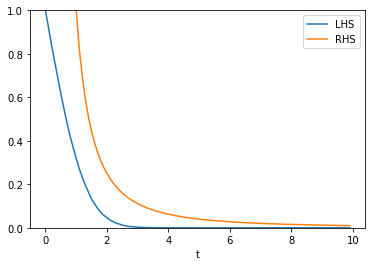

In [2]:
# Set the t specified in the corollary
t = 3

# Set the random variable X and generate 100000 samples of it
# We use normal distribution as an example, can change it to different distribution but need to specify the mu and sigma
mu = 2
sigma = 1
X = np.random.normal(loc = mu, scale = sigma, size = 100000)

# We will demonstrate the inequality by directly compute the right hand side and approximate the left hand side by 100000 samples
# We will also vary t so see how the relationship change as t changes

# Initialize the collection of LHS and RHS as we change t
LHS = []
RHS = []

# Define the range of t we want to change, can modify it to generate different plots
t_range = np.arange(0, 10, 0.1)

# iterate over all the t in t_range
for t in t_range:
    # once we specify t, we sample 100000 X as defined above
    X = np.random.normal(loc = mu, scale = sigma, size = 100000)
    # We approximate the LHS by calculating the portion of the sample that match the condition
    LHS.append(np.sum(np.abs(X - mu) >= t) / len(X))
    # We calculate the RHS directly
    RHS.append(sigma ** 2 / t ** 2)

# plot the resulting RHS and LHS as we vary t
plt.figure()
plt.ylim(0, 1)
plt.plot(t_range, LHS, label = "LHS")
plt.plot(t_range, RHS, label = "RHS")
plt.xlabel("t")
plt.legend()
plt.show()

Definition of variance:  
Var$(X):= \mathbb{E}(X - \mathbb{E}X)^2 $

In [14]:
#Compute sample variance of sample_normal using numpy:
np.var(sample_normal, ddof = 1)

0.75037793697739097

##### Question 1.1.2: What does "ddof" value represent for?

#### 1.2 Implement basic probability concepts for samples drawn from the standard normal distribution using self-defined functions (mean, variance, L^p norm, L^infinty norm, covariance):

In [15]:
#Compute sample mean of a sample:
def mean(ar):
    return np.sum(ar)/len(ar)

#Compute sample variance of a sample:
def variance(ar):
    mean = np.sum(ar)/len(ar)
    ar_demean = ar-mean
    ar_demean_squared = np.square(ar_demean)
    return np.sum(ar_demean_squared)/(len(ar)-1)

##### Question 1.2.1: To compute the sample variance, why is the denominator in the last step is (the number of the sample - 1), instead of (the number of the sample)? (Hint: Bessel correction.)

Please mimic the definitions of functions for mean and variance and define functions for $L^p$ ($p < \infty$ ) norm and $L^\infty$ norm. 

Definition of $L^p$ norm:   
$\|X \|_{L^p} := (\mathbb{E}|X|^p)^{\frac{1}{p}}$

Definition of $L^{\infty}$ norm:  
$\|X \|_{L^{\infty}} := ess \sup|X|$

In [17]:
# Your code goes here:
#Compute L^p norm of a sample:
def L_p(ar,p):
    ar_abs_power_p = np.power(np.abs(ar),p)
    return (np.sum(ar_abs_power_p)/len(ar))**(1/p)

#Compute L^infinity norm of a sample:
def L_infinity(ar):
    ar_abs = np.abs(ar)
    return np.max(ar_abs)


Definition of covariance of two random variables $X$ and $Y$:   
$cov(X,Y):= \mathbb{E}((X-\mathbb{E}X)(Y-\mathbb{E}Y))$

In [ ]:
#Compute covariance of two input samples:
def cov(x,y):
    if len(x) == len(y):
        mean_x = np.mean(x)
        mean_y = np.mean(y)
        return np.sum((x - mean_x)*(y-mean_y))/(len(x)-1)
    else:
        print('There is an issue of missing data.')

##### Question 1.2.2: 
##### (a) Why is the denominator in the last step is (the number of the sample - 1), instead of (the number of the sample)?
##### (b) When the issue of "missing data" occurs, what could be a plausible solution?


Please call the self-defined functions and compare the results with the ones you obtain by calling the built-in function in numpy for sample_normal.

In [30]:
#Your codes goes here:
#Use the self-defined function to compute sample mean:
print(mean(sample_normal))
#Use the self-defined function to compute sample variance:
print(variance(sample_normal))
#Use the self-defined function to compute L^3 norm of the sample:
print(L_p(sample_normal-mean(sample_normal),3))
#Use the self-defined function to compute L^infinity norm of the sample:
print(L_infinity(sample_normal))
#Use the self-defined function to compute the covariance of two samples:
sample_1 = sample_normal[1:11]
sample_2 = sample_normal[11:21]
print(cov(sample_1,sample_2))

0.131373471269
0.750377936977
0.992956195158
2.03949392914
-0.0563367866223


### 2. Bernoulli Distribution

In [25]:
#Draw 50 samples from a random variable of Bernoulli distribution taking values 1 and -1 with probablity 1/2:
sample_bernoulli = np.random.binomial(1,1/2,50)
print(sample_bernoulli)

[0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 1 1 0 0 0]


#### 2.1 Implement basic probability concepts for samples drawn from the Bernoulli distribution using numpy functions (mean and variance):

Please call the built-in functions in numpy (for mean and variance) to compute the sample mean and sample variance for the sample_bernoulli.

In [26]:
# Your codes goes here:
#Compute sample mean of sample_bernoulli using numpy:
print(np.mean(sample_bernoulli))
#Compute sample variance of sample_bernoulli using numpy and self_defined function:
print(np.var(sample_bernoulli,ddof = 1))

0.5
0.255102040816


##### Question 2.1.1: 
##### (a) Can you quantify the accuracy of the sample mean as estimations for the mean of the random variable in this case? Does the same estimate in Question 1.1.1 (b) hold? Hint: One can invoke Chebyshev's inequality as in Question 1.1.1(b). 
##### (b) In the current setting, one does not know the exact distribution of the sum of the Bernoulli random variables as in Question 1.1.1. (c). However, one might recall the central limit theorem (VB, Theorem 1.3.2) and hope to approximate the distribution for the sum of the Bernoulli random variables by a normal distribution. Is this possible to render an exponential decay (of the estimation error) in the sample size? (Hint: What is the convergence rate of the central limit theorem?) 

#### Reference: Graphic Illustration of the central limit theorem (VB, Theorem 1.3.2)

In [33]:
# Note: If the below graph can't be displayed correctly, run the following code in command line
# pip install ipywidgets
# pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install
# jupyter nbextension enable --py widgetsnbextension

In [7]:
# Define a function that take the power alpha and a set of sample X with dimension n times m. n represents the number of samples
# and m represent the size of each sample
def CLT(alpha, X):  
    # plot the distribution with regard to alpha using sns.distplot()
    sns.distplot(np.sum(X, axis = 1) / (X.shape[1] ** alpha))
    #x = np.linspace(mu - 1 * np.sqrt(mu), mu + 1 * np.sqrt(mu))
    
    # also plot the normal distribution it should converge to 
    #plt.plot(x, stats.norm.pdf(x, mu, np.sqrt(mu) / np.sqrt(k)))
    
# can change the range of k and drag the bar to see the change 
X = np.random.poisson(lam = 4, size = (10000, 10))
interact(CLT, alpha = (0, 1, 0.1), X = fixed(X))

interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.0), Output()), _dom_classes=('widget-i…

<function __main__.CLT(alpha, X)>

In [ ]:
# Define a function that take the power alpha and a set of sample X with dimension n times m. n represents the number of samples
# and m represent the size of each sample
def CLT(alpha, X):  
    # sum all the number in each sample
    #your codes go in here
    
    # divide by sample size to the power of alpha, (be careful on whether to divide by m or n)
    #your codes go in here
    
    # plot the distribution with regard to alpha using sns.distplot(). If you are unfamiliar with the function, google the API for sns
    #your codes go in here

#initialize the X, can change to what ever distribution and whatever size
X = np.random.poisson(lam = 4, size = (10000, 10))
    
# can change the range of k and drag the bar to see the change, no need to change this
interact(CLT, alpha = (0, 1, 0.1), X = fixed(X))

#### Reference: Graphic Illustration of the convergence rate in the central limit theorem (VB, Theorem 2.1.3 Berry-Esseen central limit theorem)

In [3]:
# We will use poission distribution as an example, can change to other distribution but need to change corresponding mu and sigma
mu = 3
sigma = np.sqrt(mu)

# N is the size of the sample. Both N and t can change
N = 30
t = 0.5
Zn = (np.mean(np.random.poisson(lam = mu, size = (10000, N)), axis = 1) - mu) / sigma * np.sqrt(N)
rho = np.mean(np.abs((np.random.poisson(lam = mu, size = 1000000) - mu) ** 3)) / sigma ** 3

# calculate the resulting LHS and RHS, probability is estimated by 1000000 sample
RHSP = np.sum(Zn >= t) / len(Zn)
LHSP = 1 - norm.cdf(t)
RHS = rho / np.sqrt(N)

# Print the two sides, see the relationship
print(np.abs(LHSP - RHSP))
print(RHS)

0.0002624612740131371
0.2992414861559882


In [4]:
# can vary t by dragging the bar, essentially convert above lines to a function
def CLT_diff(t):
    LHS_list = []
    RHS_list = []
    # vary N from 2 to 50000 with step size 100, for each N and the given t, we calculate the RHS and the LHS
    for N in range(2, 5000, 100):
        Zn = (np.mean(np.random.poisson(lam = mu, size = (1000, N)), axis = 1) - mu) / sigma * np.sqrt(N)
        rho = np.mean(np.abs((np.random.poisson(lam = mu, size = 10000) - mu) ** 3)) / sigma ** 3
        RHSP = np.sum(Zn >= t) / len(Zn)
        LHSP = 1 - norm.cdf(t)
        RHS = rho / np.sqrt(N)
        LHS_list.append(np.abs(LHSP - RHSP))
        RHS_list.append(RHS)
    # After we get the result for each N, we plot the result
    plt.plot(range(2, 5000, 100), LHS_list, label = "LHS")
    plt.plot(range(2, 5000, 100), RHS_list, label = "RHS")
    plt.xlabel("N")
    plt.legend()

# Now can drag the bar and vary t to see how the RHS and LHS changes
interact(CLT_diff, t = (-3,3 , 0.1))

interactive(children=(FloatSlider(value=0.0, description='t', max=3.0, min=-3.0), Output()), _dom_classes=('wi…

<function __main__.CLT_diff(t)>

##### Question 2.1.1 Continued:
##### (c) Is the bound provided by Chebyshev's inequality sharp? Is there any better estimate available in this case? (Hint: Hoeffding’s inequality / VB, Theorem 2.2.2 and Theorem 2.2.5) 

#### 2.2 Implement basic probability concepts for samples drawn from the standard normal distribution using self-defined functions (mean, variance, $L^p (p < \infty)$ norm, $L^{\infty}$ norm, covariance):

Please call the self-defined functions and compare the results with the ones you obtain by calling the built-in function in numpy for sample_bernoulli.

In [32]:
# Your code goes here:
#Use the self-defined function to compute mean of the sample:
print(mean(sample_bernoulli))
#Use the self-defined function to compute variance of the sample:
print(variance(sample_bernoulli))
#Use the self-defined function to compute L^4 norm of the sample:
print(L_p(sample_normal-mean(sample_bernoulli),4))
#Use the self-defined function to compute L^infinity norm of the sample:
print(L_infinity(sample_bernoulli))
#Use the self-defined function to compute the covariance of two samples:
sample_1 = sample_bernoulli[1:20]
sample_2 = sample_bernoulli[21:40]
print(cov(sample_1,sample_2))

0.5
0.255102040816
1.14260754336
1
-0.0497076023392
